In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
df=pd.read_csv('C://Users//sunilkumar//Desktop//Python_Tutorial//Datasets//spam.csv',encoding='latin-1')
#latin-1 is to accept all special characters in the data

In [24]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [26]:
#We dont need Unnamed:2 Unnamed:3 Unnamed:4
#Need to rename the column names to easy understanding
#df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1':'Class','v2':'Message'},inplace=True)
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [27]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.tail()

,Class,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [35]:
print(df.info())
print(100*'=')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
       Class                 Message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [32]:
#Checking if any null values present in the dataset
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [30]:
#Checking the count of spam and ham messages in the dataset 
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

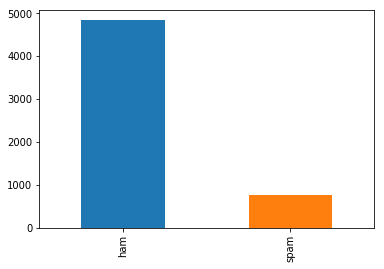

In [37]:
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [62]:
#Data preprocessing
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
Preprocessed_Message=[]
for message in df['Message'].values:
    message = re.sub("[^A-Za-z]", " ", message) #1
    message = message.lower() #2
    message = message.split() #3
    stemmer = PorterStemmer()   #4. to find the  root meaning word of each word         
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))] #5
    message = " ".join(message) #6 #Keeping cleaned words together
    Preprocessed_Message.append(message.strip())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunilkumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
#Replacing Message column with preprocessed messages
df['Message']=Preprocessed_Message
df['Message'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: Message, dtype: object

In [50]:
#Converting Categorical class value into numerical value
df['Class'].replace({'ham':0,'spam':1},inplace=True)
df.head()
df['Class'].value_counts()

0    4825
1     747
Name: Class, dtype: int64

In [68]:
#Feature Selection
x=df['Message'].values
y=df['Class'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
print('shape of xtrain',x_train.shape)
print('shape of xtest',x_test.shape)
print('shape of ytrain',y_train.shape)
print('shape of ytest',y_test.shape)

shape of xtrain (3900,)
shape of xtest (1672,)
shape of ytrain (3900,)
shape of ytest (1672,)


In [87]:
#BOW converting text into vectors
from sklearn.feature_extraction.text import CountVectorizer
BOW_Message=CountVectorizer(ngram_range=(1,2))
BOW_Message.fit(x_train)
BOW_Message_xtrain_vector=BOW_Message.transform(x_train)
BOW_Message_xtest_vector=BOW_Message.transform(x_test)
print('shape of BOW_Message_xtrain_vector',BOW_Message_xtrain_vector.shape)
print('shape of BOW_Message_xtest_vector',BOW_Message_xtest_vector.shape)
print('dimension of BOW_Message_xtrain_vector',BOW_Message_xtrain_vector.ndim)
print('dimension of BOW_Message_xtest_vector',BOW_Message_xtest_vector.ndim)

shape of BOW_Message_xtrain_vector (3900, 27012)
shape of BOW_Message_xtest_vector (1672, 27012)
dimension of BOW_Message_xtrain_vector 2
dimension of BOW_Message_xtest_vector 2


In [90]:
print(y_train.ndim)
print(y_train.reshape(-1,1).ndim)

1
2


In [108]:
#Since given dataset is a imbalanced dataset we have to use measurement technique other than Accuracy
#Hyper parameter tunning using Cross Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
y_train_dim2=y_train.reshape(-1,1)
alpha_value=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
rocauc_avg_score=[]
for i in alpha_value:
    MNB=MultinomialNB(alpha=i)
    rocaucscore=cross_val_score(MNB,BOW_Message_xtrain_vector,y_train_dim2,cv=3,scoring='roc_auc')
    rocauc_avg_score.append(rocaucscore.mean())
print(rocauc_avg_score)
print(rocauc_avg_score.index(max(rocauc_avg_score)))
print(alpha_value[rocauc_avg_score.index(max(rocauc_avg_score))])

[0.9831752412875758, 0.9863451486106892, 0.9898856516232777, 0.992487638804927, 0.9895479413256268, 0.9688934486730244, 0.9399607714459272, 0.925513360697138, 0.9230433294386575]
3
0.1


accuracy of the model 0.9832535885167464
ROC_AUC score 0.9784428908547127
[[1442   12]
 [  16  202]]


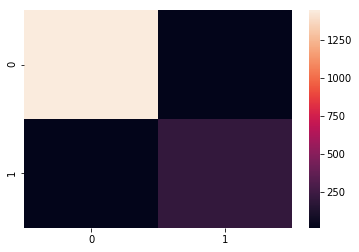

In [127]:
MNB=MultinomialNB(alpha=0.1)
MNB.fit(BOW_Message_xtrain_vector,y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('accuracy of the model',accuracy_score(y_test,MNB.predict(BOW_Message_xtest_vector)))
print('ROC_AUC score',roc_auc_score(y_test,MNB.predict_proba(BOW_Message_xtest_vector)[:,1]))
print(confusion_matrix(y_test,MNB.predict(BOW_Message_xtest_vector)))
sns.heatmap(confusion_matrix(y_test,MNB.predict(BOW_Message_xtest_vector)))
plt.show()

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_Message=TfidfVectorizer(ngram_range=(1,2))
TFIDF_Message.fit(x_train)
TFIDF_Message_xtrain_vector=TFIDF_Message.transform(x_train)
TFIDF_Message_xtest_vector=TFIDF_Message.transform(x_test)
print('shape of TFIDF_Message_xtrain_vector',TFIDF_Message_xtrain_vector.shape)
print('shape of TFIDF_Message_xtest_vector',TFIDF_Message_xtest_vector.shape)
print('dimension of TFIDF_Message_xtrain_vector',TFIDF_Message_xtrain_vector.ndim)
print('dimension of TFIDF_Message_xtest_vector',TFIDF_Message_xtest_vector.ndim)

shape of TFIDF_Message_xtrain_vector (3900, 27012)
shape of TFIDF_Message_xtest_vector (1672, 27012)
dimension of TFIDF_Message_xtrain_vector 2
dimension of TFIDF_Message_xtest_vector 2


In [140]:
alpha_value=[0.0001,0.001,0.01,0.1,1,10,10,100,1000,10000]
rocauc_avg_score_tfidf=[]
for i in alpha_value:
    MNB=MultinomialNB(alpha=i)
    score=cross_val_score(MNB,TFIDF_Message_xtrain_vector,y_train_dim2,cv=3,scoring='roc_auc')
    rocauc_avg_score_tfidf.append(score.mean())
print(rocauc_avg_score_tfidf)
print(rocauc_avg_score_tfidf.index(max(rocauc_avg_score_tfidf)))
print(alpha_value[rocauc_avg_score_tfidf.index(max(rocauc_avg_score_tfidf))])

[0.9885244068912712, 0.9905398933391257, 0.9922340195815212, 0.9928117738116953, 0.9875728107890626, 0.9730996999986409, 0.9730996999986409, 0.9617581248183601, 0.9592517147427179, 0.9589891892056093]
3
0.1


accuracy of the model 0.986244019138756
ROC_AUC score 0.98749416352233
[[1451    3]
 [  20  198]]


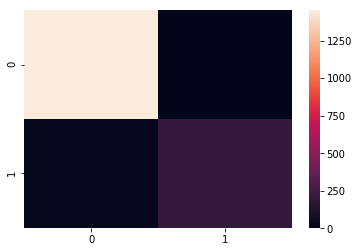

In [141]:
MNB=MultinomialNB(alpha=0.1)
MNB.fit(TFIDF_Message_xtrain_vector,y_train)
print('accuracy of the model',accuracy_score(y_test,MNB.predict(TFIDF_Message_xtest_vector)))
print('ROC_AUC score',roc_auc_score(y_test,MNB.predict_proba(TFIDF_Message_xtest_vector)[:,1]))
print(confusion_matrix(y_test,MNB.predict(TFIDF_Message_xtest_vector)))
sns.heatmap(confusion_matrix(y_test,MNB.predict(TFIDF_Message_xtest_vector)))
plt.show()